<a href="https://colab.research.google.com/github/efsnkrc/AutoEncoder_Unet/blob/master/AutoEncoder_Unet_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)
#!pip install keras_tqdm
import numpy as np
from matplotlib import pyplot as plt
import copy
import os
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Reshape, Conv2D, BatchNormalization, Activation, MaxPooling2D, Concatenate, concatenate, Input, Dense, Flatten, Conv2DTranspose
from keras.optimizers import Adam
from keras_tqdm import TQDMCallback, TQDMNotebookCallback
from keras.callbacks import ModelCheckpoint

2.2.0-rc3


Using TensorFlow backend.


In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = (x_train/255).astype(np.float32)
x_test = (x_test/255).astype(np.float32)

y_train = copy.deepcopy(x_train)
y_test = copy.deepcopy(x_test)

print(x_train.shape)

saveDir = "/opt/files/python/autoencoder/cifar10/"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)


(50000, 32, 32, 3)


In [0]:
def create_model():
  inputs = Input(shape = x_train.shape[1:])
  conv1 = Conv2D(32, (3, 3), padding='same')(inputs)
  conv1 = BatchNormalization()(conv1)
  conv1 = Activation('relu')(conv1)
  conv1 = Conv2D(32, (3, 3), padding='same')(conv1)
  conv1 = BatchNormalization()(conv1)
  conv1 = Activation('relu', name='conv1')(conv1)
  
  max1 = MaxPooling2D(2)(conv1)
  
  conv2 = Conv2D(64, (3, 3), padding='same')(max1)
  conv2 = BatchNormalization()(conv2)
  conv2 = Activation('relu')(conv2)
  conv2 = Conv2D(64, (3, 3), padding='same')(conv2)
  conv2 = BatchNormalization()(conv2)
  conv2 = Activation('relu')(conv2)  
  
  max2 = MaxPooling2D(2)(conv2)
  
  conv3 = Conv2D(128, (3, 3), padding='same')(max2)
  conv3 = BatchNormalization()(conv3)
  conv3 = Activation('relu')(conv3)
  conv3 = Conv2D(128, (3, 3), padding='same')(conv3)
  conv3 = BatchNormalization()(conv3)
  conv3 = Activation('relu')(conv3)  
  
  max3 = MaxPooling2D(2)(conv3)
  
  conv4 = Conv2D(256, (3, 3), padding='same')(max3)
  conv4 = BatchNormalization()(conv4)
  conv4 = Activation('relu')(conv4)
  conv4 = Conv2D(256, (3, 3), padding='same')(conv4)
  conv4 = BatchNormalization()(conv4)
  conv4 = Activation('relu')(conv4)  
  
  max4 = MaxPooling2D(2)(conv4)
  
  max4 = Flatten()(max4)

  bottle_neck = Dense(256)(max4)
  bottle_neck = BatchNormalization()(bottle_neck)
  bottle_neck = Activation('relu')(bottle_neck)
  bottle_neck = Dense(1024)(bottle_neck)
  bottle_neck = BatchNormalization()(bottle_neck)
  bottle_neck = Activation('relu')(bottle_neck)
  bottle_neck = Reshape((2,2,256))(bottle_neck) 

  deconv1 = Conv2DTranspose(256, (3,3), strides=(2,2), padding='same')(bottle_neck)
  deconv1 = Concatenate()([conv4, deconv1])
  deconv1 = Conv2D(256, (3,3), padding='same')(deconv1)
  deconv1 = BatchNormalization()(deconv1)
  deconv1 = Activation('relu')(deconv1)
  deconv1 = Conv2D(256, (3,3), padding='same')(deconv1)
  deconv1 = BatchNormalization()(deconv1)
  deconv1 = Activation('relu')(deconv1)
  
  deconv2 = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same')(deconv1)
  deconv2 = Concatenate()([conv3, deconv2])
  deconv2 = Conv2D(128, (3,3), padding='same')(deconv2)
  deconv2 = BatchNormalization()(deconv2)
  deconv2 = Activation('relu')(deconv2)
  deconv2 = Conv2D(128, (3,3), padding='same')(deconv2)
  deconv2 = BatchNormalization()(deconv2)
  deconv2 = Activation('relu')(deconv2)

  
  deconv3 = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same')(deconv2)
  deconv3 = Concatenate()([conv2, deconv3])
  deconv3 = Conv2D(64, (3,3), padding='same')(deconv3)
  deconv3 = BatchNormalization()(deconv3)
  deconv3 = Activation('relu')(deconv3)
  deconv3 = Conv2D(64, (3,3), padding='same')(deconv3)
  deconv3 = BatchNormalization()(deconv3)
  deconv3 = Activation('relu')(deconv3)
  
  deconv4 = Conv2DTranspose(32, (3,3), strides=(2,2), padding='same')(deconv3)
  deconv4 = Concatenate()([conv1, deconv4])
  deconv4 = Conv2D(32, (3,3), padding='same')(deconv4)
  deconv4 = BatchNormalization()(deconv4)
  deconv4 = Activation('relu')(deconv4)
  deconv4 = Conv2D(32, (3,3), padding='same')(deconv4)
  deconv4 = BatchNormalization()(deconv4)
  deconv4 = Activation('relu')(deconv4)
  
  final_layer = Conv2D(3, (3,3), padding='same')(deconv4)
  final_layer = BatchNormalization()(final_layer)
  final_layer = Activation('sigmoid')(final_layer)

  return Model(inputs, final_layer)

In [22]:
model = create_model()
model.compile(optimizer = Adam(lr=0.0001),loss='mean_squared_error')
filepath=saveDir+"AutoEncoder_Cifar10_Deep_weights.{epoch:02d}-{loss:.6f}-{val_loss:.6f}.hdf5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=False)
tqdm = TQDMNotebookCallback(metric_format="{name}: {value:0.6f}",leave_inner=True , leave_outer=True)
history = model.fit(x_train, y_train, epochs=10, verbose = 0, validation_data=(x_test, y_test), callbacks=[tqdm, checkpoint])



Epoch 00001: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.01-0.005356-0.001510.hdf5




Epoch 00002: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.02-0.001788-0.000699.hdf5




Epoch 00003: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.03-0.001200-0.000452.hdf5




Epoch 00004: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.04-0.000964-0.000421.hdf5




Epoch 00005: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.05-0.000812-0.000287.hdf5




Epoch 00006: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.06-0.000716-0.000258.hdf5




Epoch 00007: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.07-0.000648-0.000242.hdf5




Epoch 00008: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.08-0.000619-0.000225.hdf5




Epoch 00009: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.09-0.000571-0.000214.hdf5




Epoch 00010: saving model to /opt/files/python/autoencoder/cifar10/AutoEncoder_Cifar10_Deep_weights.10-0.000529-0.000292.hdf5



In [0]:
def plot_predictions(images, predictions):
  n = images.shape[0]
  f, axes = plt.subplots(2, n)
  for i in range(n):
    
    axes[0, i].imshow(images[i])
    axes[1, i].imshow(predictions[i])

  plt.gcf().set_size_inches(16, 4)  
  plt.show()

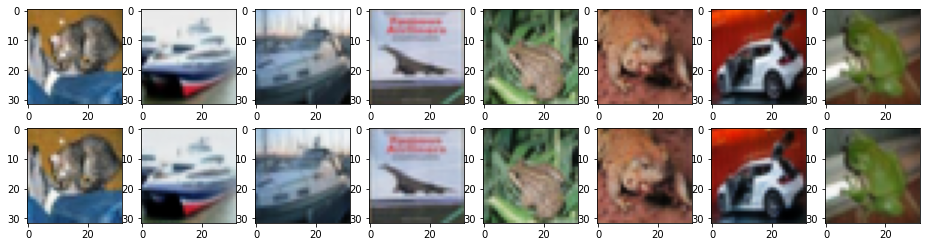

In [24]:
plot_predictions(np.squeeze(x_test[:8]), np.squeeze(model.predict(x_test[:8]))) 